# Stack

## 목차
### 1. 스택
### 2. 재귀호출
### 3. Memoization
### 4. DP
### 5. DFS

## 1. 스택

### 스택(Stack)
물건을 쌓아 올리듯 자료를 쌓아 올린 형태의 자료구조
- 스택에 저장된 자료 : 선형구조(자료 간의 관계가 1대 1)
- 스택에 자료를 삽입(push)하거나, 스택에서 자료를 꺼낼(pop) 수 있다.
- 후입선출(LIFO, Last In First Out)

#### 스택을 프로그램에서 구현하기 위해 필요한 자료구조와 연산
자료구조 : 자료를 선형으로 저장할 저장수
- 배열 사용 가능
- 저장소 자체를 스택이라고 부르기도 함
- top : 스택에서 마지막 삽입된 원소의 위치

연산 
- 삽입(push) : 저장소에 자료를 저장
- 삭제(pop) : 저장소에 저장된 자료를 삽입한 역순으로 꺼냄
- isEmpty : 스택이 공백인지 아닌지 확인
- peek : 스택의 top에 있는 원소 반환

#### 스택 구현시 고려사항
1차원 배열을 사용하여 스택을 구현할 경우, 구현이 용이하지만 스택의 크기를 변경하기 어렵다(size 고정)
- 이를 해결하기 위한 방법으로 저장소를 동적으로 할당하여 스택을 구현할 수 있다
#### 동적 연결리스트 
동적 연결리스트를 이용하여 구현시, 구현 자체는 복잡하지만 메모리를 효율적으로 사용 가능



In [1]:
# 스택 생성과 연산
size = 10
stack = [0] * size
top = -1
# push
def push(item, size):
    global top
    top += 1
    # top의 위치가 stack의 길이와 같아질 경우 : push 불가(overflow)
    if top == size:
        print('OverFlow : top = size')
        return
    else:
        stack[top] = item

# isEmpty
def isEmpty(stack):
    if stack == []:
        return True
    else: 
        return False
# pop
def pop():
    global top
    # 스택이 비어있을 경우(isEmpty is True)
    if isEmpty(stack):
        print('UnderFlow : Stack is Empty')
        return
    else:
        top -= 1
        return stack[top+1]

# peek
def peek():
    return stack[top]



## 2. 재귀호출

### 재귀호출(Function Call)
자기 자신을 호출하여 순환적으로 수행하는 것
- 프로그램 크기를 줄이고 간단하게 작성 가능
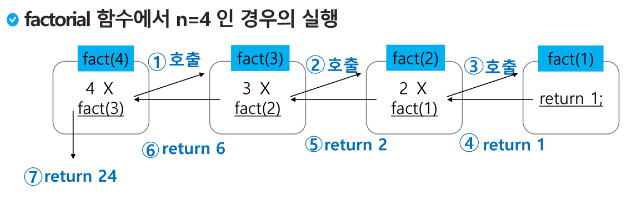

#### 피보나치 수열
재귀호출을 이용한 피보나치
```python
def Fibonacci(n):
    if n < 2:
        return n
    else:
        return Fibonnaci(n-1) + Fibonnaci(n-2)
```

## 3. Memoization

### 재귀함수의 문제점
재귀함수로 피보나치 수를 구현하는 알고리즘 : 엄청난 중복 호출이 존재
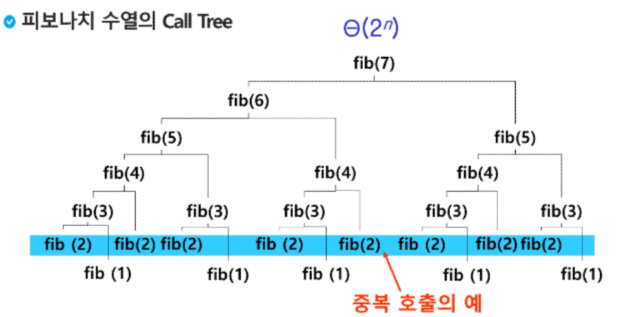

### Memoization
컴퓨터 프로그램을 실행 시, 이전에 계산한 값을 메모리에 저장해서 매번 다시 계산하지 않도록 하여 전체적인 실행속도를 빠르게 하는 기술
- 동적 계획법의 핵심



In [9]:
# 메모이제이션으로 피보나치 수를 구하기
n = 10
memo = [0] * (n+1)
memo[1] = 1

def fibo(n):
    global memo
    # 아직 memoization에 할당되지 않은 경우
    if n >= 2 and memo[n] == 0:
        # 앞의 이미 메모리에 할당되어 기억된 값들을 이용하여 새롭게 할당
        # memo[n] = memo[n-1] + memo[n-2]로 하면 안되는듯 ?? 이유는 아직 모르겠음
        memo[n] = fibo(n-1) + fibo(n-2)
    return memo[n]

print(fibo(n))
print(memo)

55
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


### 4. 동적 계획

### 동적 계획 알고리즘(Dynamic Programming, DP)
최적화 문제를 해결하는 알고리즘
- 입력 크기가 작은 부분 문제들을 모두 해결한 후, 그 해들을 이용하여 보다 큰 크기의 부분 문제들을 해결
- 최종적으로 원래 주어진 입력의 문제를 해결
- 그리디 알고리즘과 같은 구현 방법

In [ ]:
# 피보나치 수 DP 적용 알고리즘
def Fibo(n):
    dp = [0] * (n+1)
    dp[0], dp[1] = 0, 1
    for i in range(2, n+1):
        dp[i] = dp[i-1] + dp[i-2]
    return dp[n]

#### DP의 구현방식
1. recursive 방식(fibo(n))
2. iterative 방식(Fibo(n))
- memoization을 재귀적 구조에 사용하는 것보다 반복적 구조로 DP를 구현한 것이 성능 면에서 보다 효율적
- 재귀적 구조 : 내부에 시스템 호출 스택 사용시 오버헤드 발생

## 5. DFS

### 깊이 우선 탐색(Depth First Search, DFS)
비선형구조(그래프)를 탐색하는 방법 중 하나
- 시작 정점의 한 방향으로 갈 수 있는 경로가 있는 곳까지 깊이 탐색해 가다가 더 이상 갈 곳이 없을 경우, 가장 마지막에 만났던 갈림길 간선이 있는 정점으로 되돌아와서 다른 방향의 정점으로 탐색을 계속 반복하여 결국 모든 정점을 방문하는 순회방법
- 가장 마지막에 만났던 갈림길의 정점으로 되돌아가서 다시 깊이 우선 탐색 시행 : 스택(LIFO) 사용

### DFS 알고리즘 과정
1. 시작 노드 v 결정 후 방문
2. 정점 v의 인접한 정점(adjacent vertices)들 중 상황을 구분하여 다음과 같이 진행한다
    - 방문하지 않은 정점 w가 있을 경우, v를 스택에 push한 후, 정점 w를 방문한다. 방문하면 w가 v의 역할을 하여 2번 과정을 반복한다
    - 방문하지 않은 정점이 없을 경우, 탐색의 방향을 바꾸기 위해 스택을 pop하여 받은 가장 마지막 방문 정점을 v로 하여 다시 2번 과정을 반복한다
3. 스택이 빈 스택이 될 때 까지 2번을 반복한다

In [12]:
# DFS 알고리즘 구현
# stack, 방문 배열 생성
# 그래프 정보, 인접 노드 정보 필요
# 그래프의 정점이 총 10개가 있다고 가정
stack = []
visited = [0] * 11
adj_list = [[] for _ in range(N)]
for start in graph:
    adj_list[start].append(graph[start])
def DFS(start, adj_list):
    # 1. 시작 노드 방문
    visited[start] = 1
    while Ture:
        # start의 인접 노드들에 접근
        for adj in adj_list[start]:
            # 해당 인접 노드를 아직 방문하지 않은 경우
            if visited[adj] == 0:
                stack.append(start) # 현재 방문 노드를 스택에 push
                start = adj # 해당 인접 노드를 현재 방문 노드 취급 후 방문
                visited[start] = 1
                break # 새롭게 방문해야 할 노드를 찾았기 때문에 for문에서 탈출
        # 모든 인접노드가 방문한 상태인 경우 : 뒷걸음치기
        else:
            # 스택이 비어있지 않은 경우
            if stack:
                start = stack.pop() # 현재 방문중인 노드 변경 후 다시 인접노드 찾을 준비
            # 스택이 비어있는 경우 : DFS 종료
            else:
                break

                
        

In [5]:
adj_list = [[] for _ in range(5)]
print(adj_list)

for _ in range(4):
    start, end = map(int, input().split())
    adj_list[start].append(end)
print(adj_list)

[[], [], [], [], []]


 1 2
 1 3
 2 1
 2 5


[[], [2, 3], [1, 5], [], []]
